# Eigenmode and EPR analysis
### Prerequisite
You need to have a working local installation of Ansys.

## Sections
### I. Transmon only
1. Prepare the layout in qiskit-metal. <br>
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Set up EPR junction dictionary. <br>
1. Run EPR analysis on single mode. <br>
1. Get qubit freq and anharmonicity. <br>
1. Calculate EPR of substrate.  <br>
1. (Extra: Calculate surface EPR.) <br>

### II. Resonator only
1. Update the layout in qiskit-metal. <br>
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Calculate EPR of substrate. <br>
    
### III. Transmon & resonator
1. Update the layout in qiskit-metal. <br>
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Set up EPR junction dictionary. <br>
1. Run EPR analysis on the two modes. <br>
1. Get qubit frequency and anharmonicity. <br>

### IV. Analyze a coupled 2 transmon system. 
1. Finite Element Eigenmode Analysis
1. Identify the mode you want. The mode can inclusively be from 1 to setup.n_modes.
1. Set variables in the Ansys design. As before, we seek 2 modes.
1. Set up the simulation and specify the variables for the sweep.
1. Plot the E-field on the chip's surface.
1. Specify the junctions in the model; in this case there are 2 junctions.
1. Find the electric and magnetic energy stored in the substrate and the system as a whole.
1. Perform EPR analysis for all modes and variations.

In [1]:
%reload_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

# 1. Analyze the transmon qubit by itself

We will use the analysis package - applicable to most users. Advanced users might want to expand the package, or directly interact with the renderer. The renderer is one of the properties of the analysis class.

### Create the Qbit design

Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)

Create a single transmon with one readout resonator and move it to the center of the chip previously defined.

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

gui.rebuild()
gui.autoscale()

### Finite Element Eigenmode Analysis

#### Setup

Select the analysis you intend to run from the `qiskit_metal.analyses` collection.<br>
Select the design to analyze and the tool to use for any external simulation.

In [4]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [5]:
eig_qb = EPRanalysis(design, "hfss")

Review and update the convergence parameters and junction properties by executing following two cells. We exemplify three different methods to update the setup parameters.

In [6]:
eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [7]:
# example: update single setting
eig_qb.sim.setup.max_passes = 6
eig_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
eig_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1.1,
 'n_modes': 1,
 'max_delta_f': 0.4,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '11 nH', 'Cj': '0 fF'}}

#### Execute simulation and verify convergence and EM field
Analyze a single qubit with shorted terminations. Then observe the frequency convergence plot. If not converging, you might want to increase the min_passes value to force the renderer to increase accuracy.

You can use the method `run()` instead of `sim.run()` in the following cell if you want to run both eigenmode and epr analysis in a single step. If so, make sure to also tweak the setup for the epr analysis. The input parameters are otherwise the same for the two methods.

In [16]:
eig_qb.sim.renderer.stop()

PyAEDT INFO: Desktop has been released and closed.


INFO:Global:Desktop has been released and closed.


True

In [8]:
eig_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Initializing new Desktop session.


INFO:Global:Initializing new Desktop session.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Log on console is enabled.


INFO:Global:Log on console is enabled.


PyAEDT INFO: Log on file /tmp/pyaedt_abhis_a8c92847-913a-4611-b1ca-24842d1af8d6.log is enabled.


INFO:Global:Log on file /tmp/pyaedt_abhis_a8c92847-913a-4611-b1ca-24842d1af8d6.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


INFO:Global:Log on AEDT is disabled.


PyAEDT INFO: Found active AEDT gRPC session on port 50051.


INFO:Global:Found active AEDT gRPC session on port 50051.


PyAEDT INFO: Connecting to AEDT gRPC session on port 50051.


INFO:Global:Connecting to AEDT gRPC session on port 50051.


PyAEDT INFO: AEDT installation Path /ansys_inc/v252/AnsysEM


INFO:Global:AEDT installation Path /ansys_inc/v252/AnsysEM


PyAEDT INFO: Client application successfully started.


INFO:Global:Client application successfully started.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


INFO:Global:Debug logger is disabled. PyAEDT methods will not be logged.
INFO 12:36AM [__init__]: Connected to Ansys via pyaedt backend
12:36AM 00s WARNING [connect_ansys]: You are using Linux, but this is a renderer to Ansys, which only runs on Windows. Expect any sort of Errors if you try to work with this renderer beyond this point.
INFO 12:36AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:36AM [load_ansys_project]: Using backend: pyaedt


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1182257!


INFO:Global:Returning found Desktop session with PID 1182257!


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


INFO 12:36AM [__init__]: Connected to Ansys via pyaedt backend
INFO 12:36AM [load_ansys_project]: 	Opened Ansys App
INFO 12:36AM [load_ansys_project]: 	Opened Ansys Desktop v2025.2
INFO 12:36AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    /home/abhis/Ansoft/
	Project:   Project8
INFO 12:36AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
INFO 12:36AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:36AM [connect]: 	Connected to project "Project8" and design "Qbit_hfss" 😀 

INFO 12:36AM [connect_design]: 	Opened active design
	Design:    Qbit_hfss [Solution type: Eigenmode]
INFO 12:36AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:36AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1182257!


INFO:Global:Returning found Desktop session with PID 1182257!


PyAEDT INFO: Project Project8 set to active.


INFO:Global:Project Project8 set to active.


PyAEDT INFO: Active Design set to Qbit_hfss


INFO:Global:Active Design set to Qbit_hfss


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


PyAEDT INFO: Project Project8 Saved correctly


INFO:Global:Project Project8 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 0.0m 46.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 0.0m 46.0s


PyAEDT INFO: Export Convergence to  /tmp/tmpo5czv1qh.conv


INFO:Global:Export Convergence to  /tmp/tmpo5czv1qh.conv


PyAEDT INFO: Parsing /home/abhis/Ansoft/Project8.aedt.


INFO:Global:Parsing /home/abhis/Ansoft/Project8.aedt.


PyAEDT INFO: File /home/abhis/Ansoft/Project8.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File /home/abhis/Ansoft/Project8.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.04280352592468262


INFO:Global:aedt file load time 0.04280352592468262


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec
12:36AM 51s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


The last variables you pass to the `run()` or `sim.run()` methods, will be stored in the `sim.setup` dictionary under the key `run`. You can recall the information passed by either accessing the dictionary directly, or by using the print handle below.

In [9]:
# eig_qb.setup.run    <- direct access
eig_qb.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': 'Qbit', 'components': ['Q1'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



(optional) Captures the renderer GUI

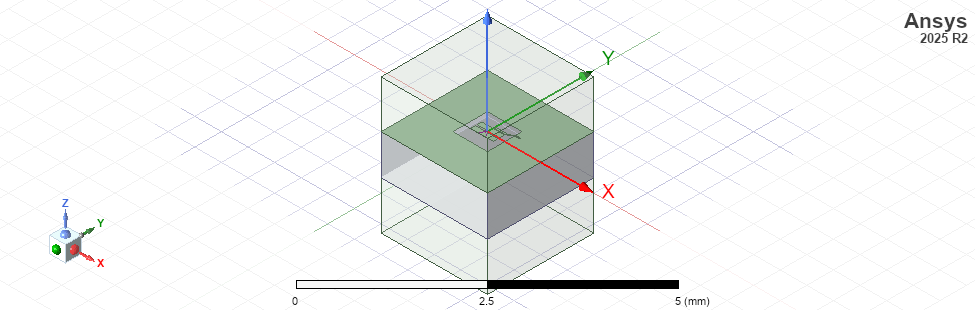

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [10]:
eig_qb.sim.save_screenshot()

(optional) Work directly with the convergence numbers

In [12]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,3.161556
2,4.767850
3,5.756671
4,6.009428
5,6.131182
6,6.201098


(optional) You can re-run the analysis after varying the parameters.<br>
Not passing the parameter `components` to the `sim.run()` method, skips the rendering and tries to run the analysis on the latest design. If a design is not found, the full metal design is rendered.

In [17]:
eig_qb.sim.setup.min_freq_ghz = 4
eig_qb.sim.run()
eig_qb.sim.convergence_f

PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Initializing new Desktop session.


INFO:Global:Initializing new Desktop session.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Log on console is enabled.


INFO:Global:Log on console is enabled.


PyAEDT INFO: Log on file /tmp/pyaedt_abhis_a8c92847-913a-4611-b1ca-24842d1af8d6.log is enabled.


INFO:Global:Log on file /tmp/pyaedt_abhis_a8c92847-913a-4611-b1ca-24842d1af8d6.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


INFO:Global:Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


INFO:Global:Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path /ansys_inc/v252/AnsysEM


INFO:Global:AEDT installation Path /ansys_inc/v252/AnsysEM


PyAEDT INFO: Client application successfully started.


INFO:Global:Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


INFO:Global:New AEDT gRPC session session started on port 50051.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


INFO:Global:Debug logger is disabled. PyAEDT methods will not be logged.
INFO 12:41AM [__init__]: Connected to Ansys via pyaedt backend
12:41AM 46s WARNING [connect_ansys]: You are using Linux, but this is a renderer to Ansys, which only runs on Windows. Expect any sort of Errors if you try to work with this renderer beyond this point.
INFO 12:41AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:41AM [load_ansys_project]: Using backend: pyaedt


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1215255!


INFO:Global:Returning found Desktop session with PID 1215255!


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


INFO 12:41AM [__init__]: Connected to Ansys via pyaedt backend
INFO 12:41AM [load_ansys_project]: 	Opened Ansys App
INFO 12:41AM [load_ansys_project]: 	Opened Ansys Desktop v2025.2
INFO 12:41AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    /home/abhis/Ansoft/
	Project:   Project9
INFO 12:41AM [connect_design]: No active design found (or error getting active design).
INFO 12:41AM [connect]: 	 Connected to project "Project9". No design detected
INFO 12:41AM [connect_design]: 	Opened active design
	Design:    Design_hfss [Solution type: Eigenmode]
WARNING 12:41AM [connect_setup]: 	No design setup detected.
WARNING 12:41AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:41AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:42AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:42AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1215255!


INFO:Global:Returning found Desktop session with PID 1215255!


PyAEDT INFO: Project Project9 set to active.


INFO:Global:Project Project9 set to active.


PyAEDT INFO: Active Design set to Design_hfss


INFO:Global:Active Design set to Design_hfss


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


PyAEDT INFO: Project Project9 Saved correctly


INFO:Global:Project Project9 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 0.0m 46.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 0.0m 46.0s


PyAEDT INFO: Export Convergence to  /tmp/tmp8k8yq3ee.conv


INFO:Global:Export Convergence to  /tmp/tmp8k8yq3ee.conv


PyAEDT INFO: Parsing /home/abhis/Ansoft/Project9.aedt.


INFO:Global:Parsing /home/abhis/Ansoft/Project9.aedt.


PyAEDT INFO: File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.0700082778930664


INFO:Global:aedt file load time 0.0700082778930664


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec
12:42AM 47s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


,re(Mode(1)) [g]
Pass [],
1,37.491575
2,4.543894
3,5.699033
4,6.006731
5,6.125647
6,6.182701


Verify that the Electro(magnetic) fields look realistic.

INFO 12:43AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


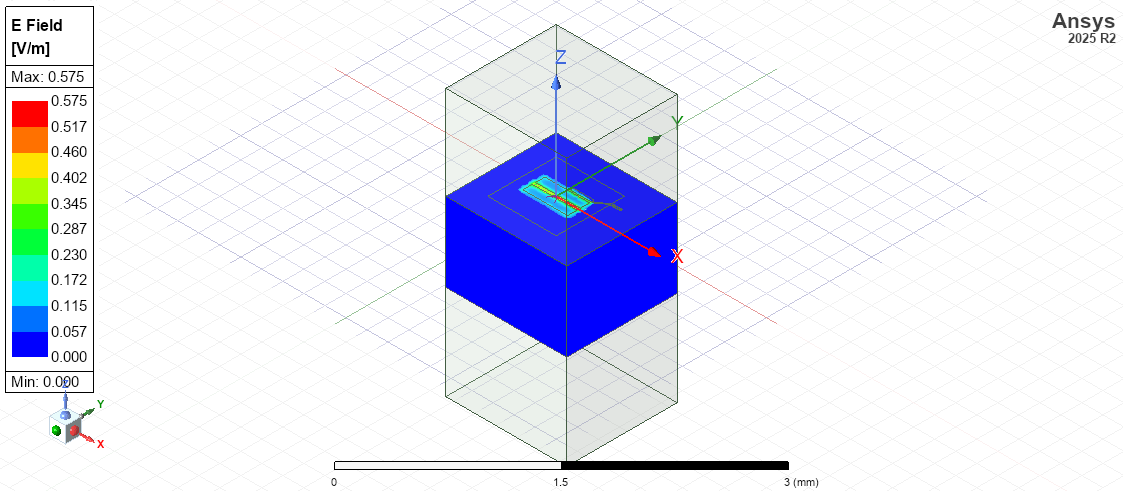

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [19]:
eig_qb.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
eig_qb.sim.save_screenshot()

(optional) clear the renderer by removing the fields

In [ ]:
eig_qb.sim.clear_fields()

### EPR Analysis
#### Setup
Identify the non-linear (Josephson) junctions in the model. You will need to list the junctions in the epr setup.

In this case there's only one junction, namely 'jj'. Let's see what we need to change in the default setup.

In [20]:
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

The name of the `Lj_variable` and `Cj_variable` match with our model. However it is missing the names of the shapes that identify the junction (`rect` and `line`). Look for those in the renderer and find the name. Then let's change the name (See below).

In [21]:
eig_qb.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qb.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qb.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

We will now run epr as a single step. On screen you will observe various information in this order:
* stored energy = Electric and magnetic energy stored in the substrate and the system as a whole.
* EPR analysis results for all modes/variations.
* Spectrum analysis.
* Hamiltonian report.

In [22]:
eig_qb.run_epr()

#### equivalent individual calls
# s = self.setup
# self.epr_start()
# eig_qb.get_stored_energy()
# eig_qb.run_analysis()
# eig_qb.spectrum_analysis(s.cos_trunc, s.fock_trunc)
# eig_qb.report_hamiltonian(s.swp_variable)

Design "Design_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Design_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 7.54492039371485e-24
        energy_elec_substrate = 6.94045414500145e-24
        EPR of substrate = 92.0%

        energy_mag    = 3.92877703291475e-26
        energy_mag % of energy_elec_all  = 0.5%
        

Variation 0  [1/1]

  Mode 0 at 6.18 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  3.772e-24 1.964e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.79%
	jj              0.903152  (+)        0.0299847
		(U_tot_cap-U_tot_ind)/mean=6.27%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9198843437477565
PyAEDT INFO: Export Convergence to  /tmp/tmpssg0_4y7.conv


INFO:Global:Export Convergence to  /tmp/tmpssg0_4y7.conv
WARNING 12:43AM [__init__]: <p>Error: <class 'IndexError'></p>
  self.Qm_coupling[variation].columns[junctions]

  result["Qs"] = self.Qs[variation][self.PM[variation].columns[junctions]][

  return np.asarray(x, float)

  return np.asarray(x, float)




ANALYSIS DONE. Data saved to:

C:\data-pyEPR/Project9/Design_hfss/2025-12-13 00-43-32.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.134306
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
        jj
0  0.87686

*** S (sign-bit matrix)
   s_jj
0    -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       318

*** Chi matrix ND (MHz) 
    356+0j

*** Frequencies O1 PT (MHz)
0    5864.600504
dtype: float64

*** Frequencies ND (MHz)
0    5846.10918+0.00000j
dtype: complex128

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,11
0,5846.11+0.00j


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
11,0,356.5+0.0j


# 2. Analyze the CPW resonator by itself
### Update the design in Metal
Connect the transmon to a CPW. <br>
The other end of the CPW connects to an open to ground termination.

In [23]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='1.75mm',  pos_y='0um', orientation='0'))
RouteMeander(design, 'readout',  Dict(
        total_length='6 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))

gui.rebuild()
gui.autoscale()

### Finite Element Eigenmode Analysis

#### Setup

Create a separate analysis object, dedicated to the readout. This allows to retain the Qubit session active, in case we will later need to tweak the design and repeat the simulation. When different renderers are available you could even consider using different more appopriate ones for each simulation steps of this notebook, but for now we will be using the same one.

In [24]:
eig_rd = EPRanalysis(design, "hfss")

For the resonator analysis we will use the default setup. Youn can feel free to edit it the same way we did in section 1.

#### Execute simulation and verify convergence and EM field
Analyze the readout in isolation. Select the readout and terminate it with an open on both ends. Note that we are selecting for this analysis both the `readout` component and the `open_to_ground` component. The `open_to_ground` component might feel redundant because we are specifying in that open in the `open_terminations`, and the end converging result is indeed the same. However the `open_to_ground` appears to help the system to converge faster, so we keep it in there.

In [25]:
eig_rd.sim.run(name="Readout",
               components=['readout', 'open_to_ground'],
               open_terminations=[('readout', 'start'), ('readout', 'end')])
eig_rd.sim.plot_convergences()

INFO 12:44AM [connect_design]: 	Opened active design
	Design:    Readout_hfss [Solution type: Eigenmode]
WARNING 12:44AM [connect_setup]: 	No design setup detected.
WARNING 12:44AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:44AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:44AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:44AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1215255!


INFO:Global:Returning found Desktop session with PID 1215255!


PyAEDT INFO: Project Project9 set to active.


INFO:Global:Project Project9 set to active.


PyAEDT INFO: Active Design set to Readout_hfss


INFO:Global:Active Design set to Readout_hfss


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


PyAEDT INFO: Project Project9 Saved correctly


INFO:Global:Project Project9 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 1.0m 17.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 1.0m 17.0s


PyAEDT INFO: Export Convergence to  /tmp/tmpf00adp44.conv


INFO:Global:Export Convergence to  /tmp/tmpf00adp44.conv


PyAEDT INFO: Parsing /home/abhis/Ansoft/Project9.aedt.


INFO:Global:Parsing /home/abhis/Ansoft/Project9.aedt.


PyAEDT INFO: File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.1362442970275879


INFO:Global:aedt file load time 0.1362442970275879


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec
12:46AM 05s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


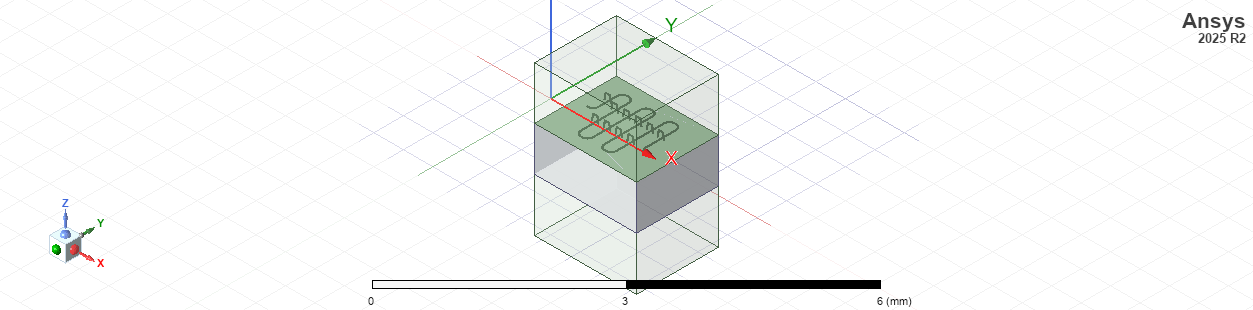

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [26]:
eig_rd.sim.save_screenshot()  # optional

Recover eigenmode frequencies for each variation.

In [27]:
eig_rd.get_frequencies()

Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,9.605435,inf


Display the Ansys modeler window and plot the E-field on the chip's surface.

INFO 12:46AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


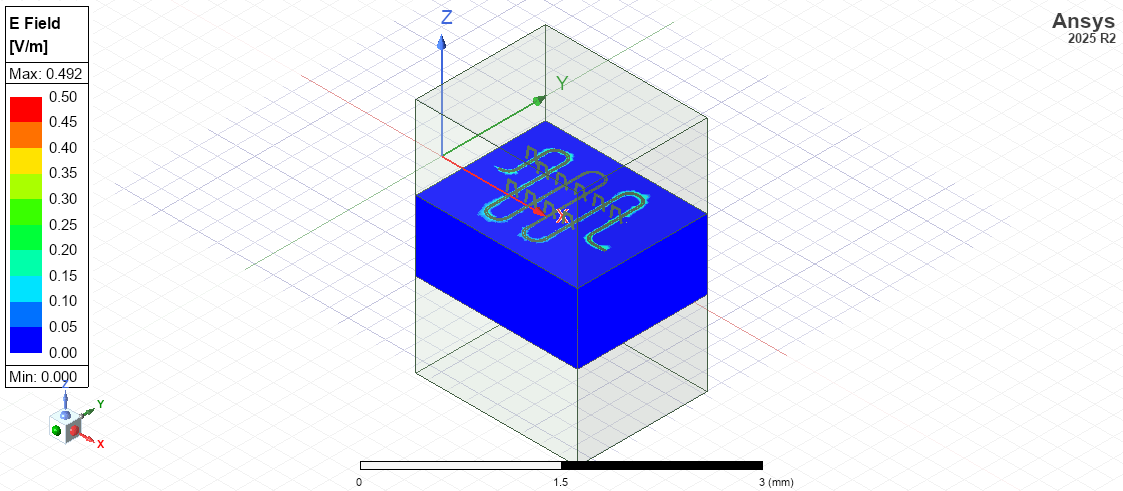

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [29]:
eig_rd.sim.plot_fields('main')
eig_rd.sim.save_screenshot()

#### Refine

If convergence is not complete, or the EM field is unclear, update the number of passes and re-run the flow (below repeated for convenience)

In [30]:
eig_rd.sim.setup.max_passes = 15   # update single setting
eig_rd.sim.run()
eig_rd.sim.plot_convergences()

INFO 12:46AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:46AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Project Project9 Saved correctly


INFO:Global:Project Project9 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 1.0m 52.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 1.0m 52.0s


PyAEDT INFO: Export Convergence to  /tmp/tmpfb5jql5w.conv


INFO:Global:Export Convergence to  /tmp/tmpfb5jql5w.conv
12:48AM 46s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


Display the Ansys modeler window again and plot the E-field on the chip's surface with this updated number of passes. <br>
Note that the bright areas have become much smoother compared to the previous image, indicating better convergence.

INFO 12:50AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


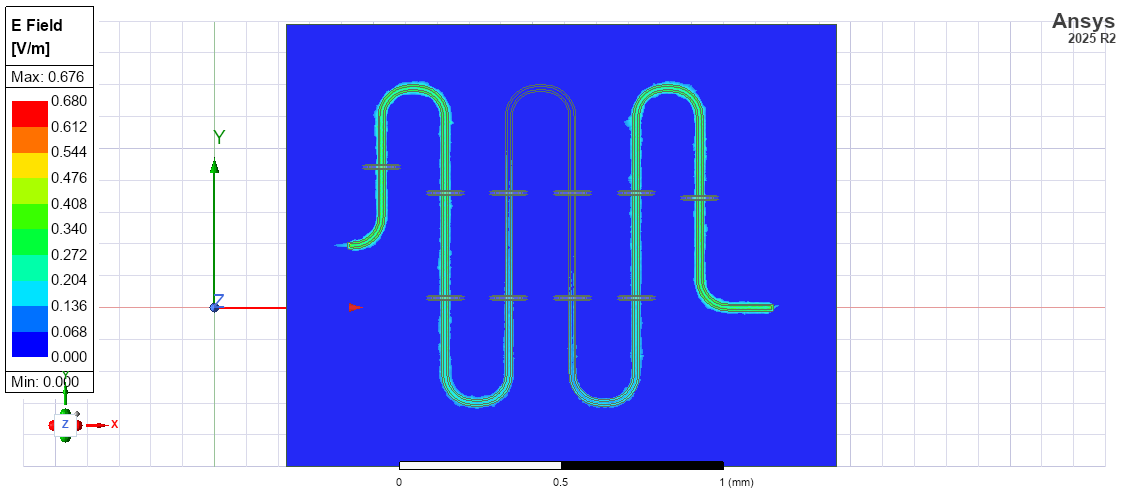

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [33]:
eig_rd.sim.plot_fields('main')
eig_rd.sim.save_screenshot()

### EPR Analysis
Find the electric and magnetic energy stored in the readout system.

In [34]:
eig_rd.run_epr(no_junctions = True)

Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 1.9701116444652e-24
        energy_elec_substrate = 1.8019956907529e-24
        EPR of substrate = 91.5%

        energy_mag    = 1.97011239396824e-24
        energy_mag % of energy_elec_all  = 100.0%
        


# 3. Analyze the combined transmon + CPW resonator system

### Finite Element Eigenmode Analysis

#### Setup

Create a separate analysis object for the combined qbit+readout.

In [35]:
eig_qres = EPRanalysis(design, "hfss")

For the resonator analysis we look for 2 eigenmodes - one with stronger fields near the transmon, the other with stronger fields near the resonator. Therefore let's update the setup accordingly.

In [36]:
eig_qres.sim.setup.n_modes = 2
eig_qres.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

#### Execute simulation and verify convergence and EM field
Analyze the qubit+readout. Select the qubit and the readout, then finalize with open termination on the other pins.

In [37]:
eig_qres.sim.setup.max_passes = 30
eig_qres.sim.setup.min_converged = 5


eig_qres.sim.run(name="TransmonResonator",
                 components=['Q1', 'readout', 'open_to_ground'],
                 open_terminations=[('readout', 'end')])
eig_qres.sim.plot_convergences()

INFO 12:51AM [connect_design]: 	Opened active design
	Design:    TransmonResonator_hfss [Solution type: Eigenmode]
WARNING 12:51AM [connect_setup]: 	No design setup detected.
WARNING 12:51AM [connect_setup]: 	Creating eigenmode default setup.
INFO 12:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:51AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:51AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1215255!


INFO:Global:Returning found Desktop session with PID 1215255!


PyAEDT INFO: Project Project9 set to active.


INFO:Global:Project Project9 set to active.


PyAEDT INFO: Active Design set to TransmonResonator_hfss


INFO:Global:Active Design set to TransmonResonator_hfss


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


PyAEDT INFO: Project Project9 Saved correctly


INFO:Global:Project Project9 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 3.0m 1.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 3.0m 1.0s


PyAEDT INFO: Export Convergence to  /tmp/tmpbap1uj8b.conv


INFO:Global:Export Convergence to  /tmp/tmpbap1uj8b.conv


PyAEDT INFO: Parsing /home/abhis/Ansoft/Project9.aedt.


INFO:Global:Parsing /home/abhis/Ansoft/Project9.aedt.


PyAEDT INFO: File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File /home/abhis/Ansoft/Project9.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.19910836219787598


INFO:Global:aedt file load time 0.19910836219787598


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec
12:54AM 41s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


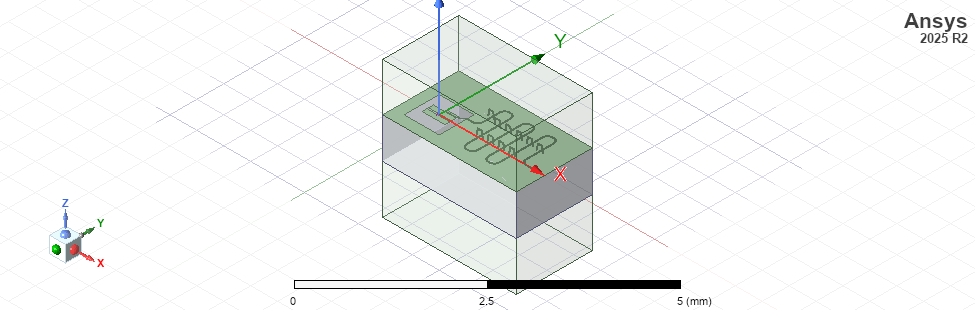

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [38]:
eig_qres.sim.save_screenshot()  # optional

Display the Ansys modeler window again and plot the E-field on the chip's surface. you can select which of the two modes to visualize.

INFO 12:55AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


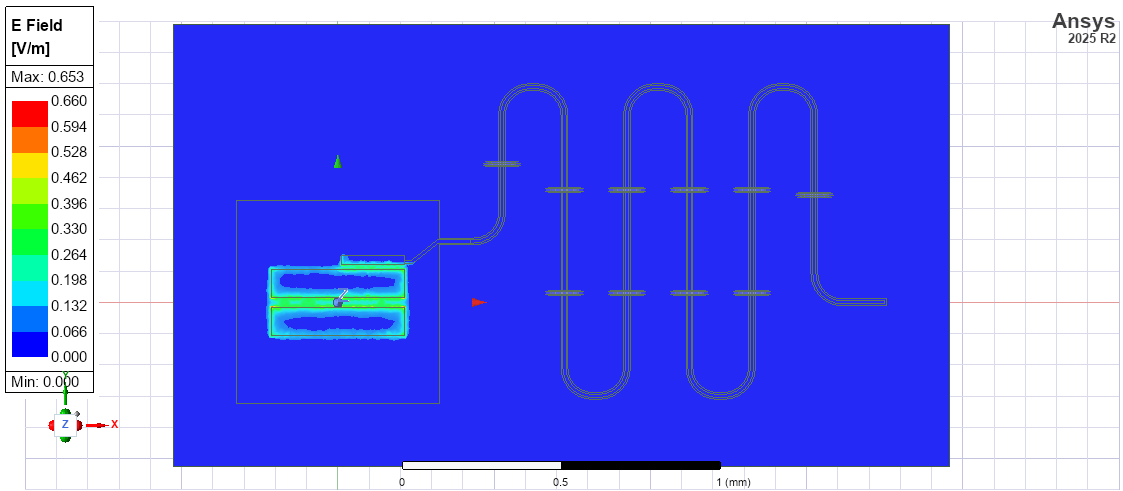

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [41]:
eig_qres.sim.plot_fields('main', eigenmode=1)
eig_qres.sim.save_screenshot()

INFO 12:55AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


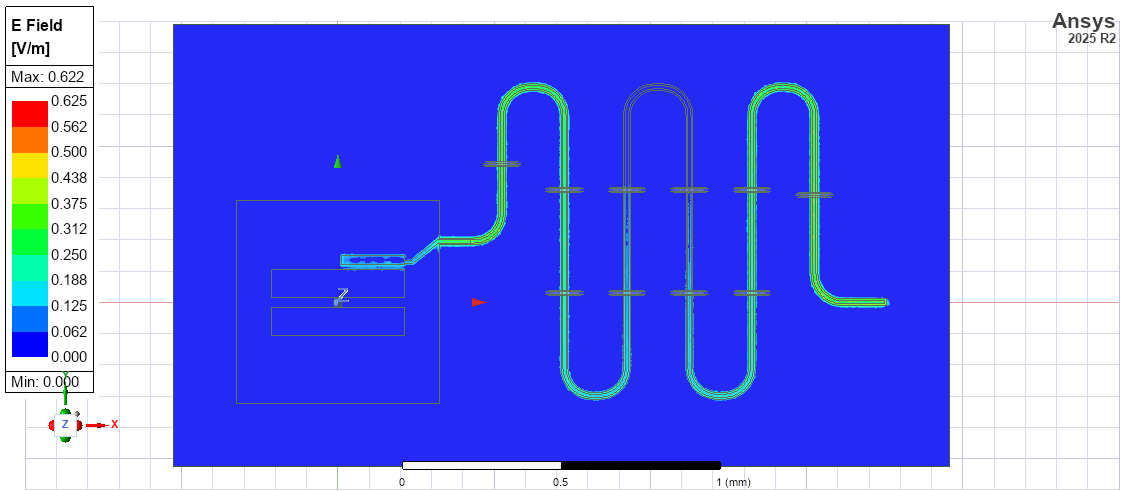

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [42]:
eig_qres.sim.plot_fields('main', eigenmode=2)
eig_qres.sim.save_screenshot()

### EPR Analysis

Similarly to section 1, we need to pass to the renderer the names of the shapes that identify the junction (`rect` and `line`). These should be the same as in section 1, or you can look again for those in the renderer.

In [43]:
eig_qres.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_qres.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_qres.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

We will now run epr as a single step. On screen you will observe various information in this order:
* stored energy = Electric and magnetic energy stored in the substrate and the system as a whole.
* EPR analysis results for all modes/variations.
* Spectrum analysis.
* Hamiltonian report.

In [44]:
eig_qres.run_epr()

Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 2.29120039747866e-24
        energy_elec_substrate = 2.10642775735903e-24
        EPR of substrate = 91.9%

        energy_mag    = 2.28397945445773e-24
        energy_mag % of energy_elec_all  = 99.7%
        

Variation 0  [1/1]

  Mode 0 at 6.30 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  1.857e-24 1.635e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.96%
	jj               0.99086  (+)        0.0310462
		(U_tot_cap-U_tot_ind)/mean=1.55%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9202346129115688

  Mode 1 at 9.35 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_elect

INFO:Global:Export Convergence to  /tmp/tmpug26theb.conv
WARNING 12:56AM [__init__]: <p>Error: <class 'IndexError'></p>
  self.Qm_coupling[variation].columns[junctions]

  result["Qs"] = self.Qs[variation][self.PM[variation].columns[junctions]][

  return np.asarray(x, float)

  return np.asarray(x, float)

  return np.asarray(x, float)




ANALYSIS DONE. Data saved to:

C:\data-pyEPR/Project9/TransmonResonator_hfss/2025-12-13 00-56-25.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.031537
1    1.033300
dtype: float64

Pm_norm idx =
      jj
0   True
1  False
*** P (participation matrix, not normlz.)
         jj
0  0.961024
1  0.003159

*** S (sign-bit matrix)
   s_jj
0     1
1    -1
*** P (participation matrix, normalized.)
      0.99
    0.0032

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       298     2.82
      2.82  0.00667

*** Chi matrix ND (MHz) 
    332+0j  2.38+0j
   2.38+0j0.00479+0j

*** Frequencies O1 PT (MHz)
0    5999.822954
1    9344.974665
dtype: float64

*** Frequencies ND (MHz)
0    5983.684007+0.000000j
1    9345.036278+0.000000j
dtype: complex128

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0

#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
0,5983.68+0.00j
1,9345.04+0.00j


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0                   1
Lj                                    
10 0  332.49+0.00j  2.38e+00+0.00e+00j
   1  2.380+0.000j  4.79e-03+0.00e+00j

Once you are sure you are done with the qubit analysis, please explicitly release the Ansys session to allow for a smooth close of the external tool.

In [45]:
eig_qb.sim.close()

PyAEDT INFO: Desktop has been released and closed.


INFO:Global:Desktop has been released and closed.


In [ ]:
eig_rd.sim.close()

In [ ]:
eig_qres.sim.close()

# 4. Analyze a coupled 2-transmon system
### Create the design

This is a different system than the one analyzed in sections 1,2,3. Therefore, let's start by deleting the design currently in the Qiskit Metal GUI (if any).

In [5]:
design.delete_all_components()

Next, we create the `TwoTransmon` design, consisting of 2 transmons connected by a short coupler.

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x = '1.0 mm',
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=-1,loc_H=+1, pad_width='200um')
    )))

coupler = RouteStraight(design, 'coupler', Dict(hfss_wire_bonds = True,
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='Q2', pin='readout')), ))

gui.rebuild()
gui.autoscale()

Let's observe the current table describing the junctions in the qiskit metal design

In [7]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,...,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name,aedt_q3d_inductance,aedt_q3d_capacitance,aedt_hfss_inductance,aedt_hfss_capacitance
0,2,rect_jj,"LINESTRING (0 -0.015, 0 0.015)",1,False,False,main,0.02,10nH,0,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0
1,3,rect_jj,"LINESTRING (1 -0.015, 1 0.015)",1,False,False,main,0.02,10nH,0,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0


You can observe in the table above that every junction has been assigned a default inductance, capacitance and resistance values, based on the originating component class `default_options`. In this example we intend to replace those values with a variable name, which will later be set directly in the renderer. Therefore, let's proceed with updating these values in the qubit instances, and then propagate the update to the table with a `rebuild()`.
After executing the cell below, you can observe the change by re-executing the cell above.

In [8]:
# TODO: fold this inside either an analysis class method, or inside the analysis class setup

qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

### Finite Element Eigenmode Analysis

#### Setup

Let's start the analysis by creating the appropriate analysis object.

In [9]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_2qb = EPRanalysis(design, "hfss")

Now let us update the setup of this analysis to reflect what we plan to do:
* define the variables that we have assigned to the inductance and capacitance of the junctions;
* increase accuracy of the convergence;
* observe the eigenmode corresponding to both qubits.

In [10]:
eig_2qb.sim.setup.max_passes = 30
eig_2qb.sim.setup.min_converged = 5
eig_2qb.sim.setup.max_delta_f = 0.05
eig_2qb.sim.setup.n_modes = 2
eig_2qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',
                           Lj2= '9 nH', Cj2= '0 fF')
eig_2qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.05,
 'max_passes': 30,
 'min_passes': 1,
 'min_converged': 5,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '13 nH', 'Cj1': '0 fF', 'Lj2': '9 nH', 'Cj2': '0 fF'}}

By default, the analysis will be done on all components that we will list in the `run_sim()` method, but the analysis needs to know how much of the ground plane around the qubit to consider. One could use the declared chip dimension by passing the parameter `bux_plus_buffer = False` to the `run_sim()` method. However, its default (when said parameter is omitted) is to consider the ground plane to be as big as the minimum enclosing rectangle plus a set buffer. The default buffer value is `200um`, while in the cell below we will increase as an example that buffer to `500um`.

In [11]:
# TODO: fold this inside either an analysis class method, or inside the analysis class setup

eig_2qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_2qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_2qb.sim.renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

Let's finally run the cap extraction simulation and observe the convergence.

In [12]:
eig_2qb.sim.run(name="TwoTransmons",
                components=['coupler', 'Q1', 'Q2'])

PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Initializing new Desktop session.


INFO:Global:Initializing new Desktop session.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Log on console is enabled.


INFO:Global:Log on console is enabled.


PyAEDT INFO: Log on file /tmp/pyaedt_abhis_1bbe3c64-3476-4ab1-9893-50988312deb2.log is enabled.


INFO:Global:Log on file /tmp/pyaedt_abhis_1bbe3c64-3476-4ab1-9893-50988312deb2.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


INFO:Global:Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


INFO:Global:Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path /ansys_inc/v252/AnsysEM


INFO:Global:AEDT installation Path /ansys_inc/v252/AnsysEM


PyAEDT INFO: Client application successfully started.


INFO:Global:Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


INFO:Global:New AEDT gRPC session session started on port 50051.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


INFO:Global:Debug logger is disabled. PyAEDT methods will not be logged.
INFO 12:59AM [__init__]: Connected to Ansys via pyaedt backend
12:59AM 57s WARNING [connect_ansys]: You are using Linux, but this is a renderer to Ansys, which only runs on Windows. Expect any sort of Errors if you try to work with this renderer beyond this point.
INFO 12:59AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:59AM [load_ansys_project]: Using backend: pyaedt


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1245147!


INFO:Global:Returning found Desktop session with PID 1245147!


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


INFO 12:59AM [__init__]: Connected to Ansys via pyaedt backend
INFO 12:59AM [load_ansys_project]: 	Opened Ansys App
INFO 12:59AM [load_ansys_project]: 	Opened Ansys Desktop v2025.2
INFO 12:59AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    /home/abhis/Ansoft/
	Project:   Project10
INFO 12:59AM [connect_design]: No active design found (or error getting active design).
INFO 12:59AM [connect]: 	 Connected to project "Project10". No design detected
INFO 01:00AM [connect_design]: 	Opened active design
	Design:    TwoTransmons_hfss [Solution type: Eigenmode]
WARNING 01:00AM [connect_setup]: 	No design setup detected.
WARNING 01:00AM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:00AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:00AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:00AM [analyze]: Analyzing setup Setup


PyAEDT INFO: Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


INFO:Global:Python version 3.11.13 (main, Aug  8 2025, 17:07:28) [Clang 20.1.4 ].


PyAEDT INFO: PyAEDT version 0.23.0.


INFO:Global:PyAEDT version 0.23.0.


PyAEDT INFO: Returning found Desktop session with PID 1245147!


INFO:Global:Returning found Desktop session with PID 1245147!


PyAEDT INFO: Project Project10 set to active.


INFO:Global:Project Project10 set to active.


PyAEDT INFO: Active Design set to TwoTransmons_hfss


INFO:Global:Active Design set to TwoTransmons_hfss


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


PyAEDT INFO: Project Project10 Saved correctly


INFO:Global:Project Project10 Saved correctly


PyAEDT INFO: Solving design setup Setup


INFO:Global:Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 17.0m 41.0s


INFO:Global:Design setup Setup solved correctly in 0.0h 17.0m 41.0s


PyAEDT INFO: Export Convergence to  /tmp/tmpw0thazjp.conv


INFO:Global:Export Convergence to  /tmp/tmpw0thazjp.conv


PyAEDT INFO: Parsing /home/abhis/Ansoft/Project10.aedt.


INFO:Global:Parsing /home/abhis/Ansoft/Project10.aedt.


PyAEDT INFO: File /home/abhis/Ansoft/Project10.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File /home/abhis/Ansoft/Project10.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.014075994491577148


INFO:Global:aedt file load time 0.014075994491577148


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec
01:17AM 53s INFO [get_f_convergence]: Saved convergences to /home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/hfss_eig_f_convergence.csv


In [17]:
eig_2qb.sim.plot_convergences()

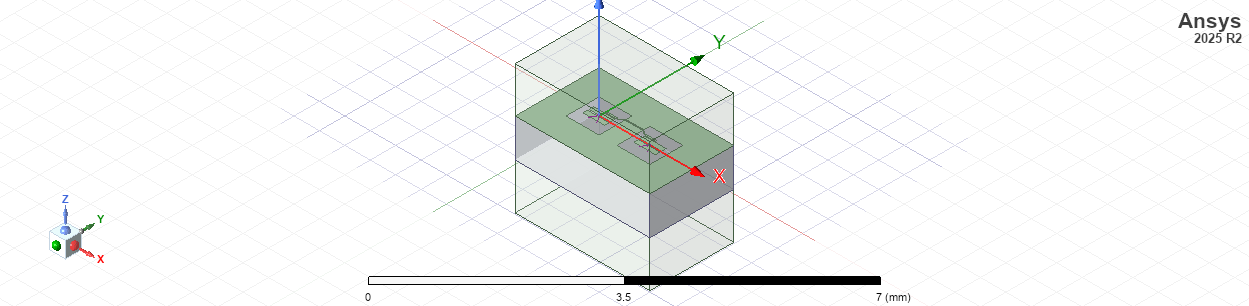

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [14]:
eig_2qb.sim.save_screenshot()  # optional

Display the Ansys modeler window again and plot the E-field on the chip's surface. Since we have analyzed 2 modes, you will need to select which mode to visualize. The default is mode 1, but the mode can inclusively be any integer between 1 and `setup.n_modes`.

INFO 01:19AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


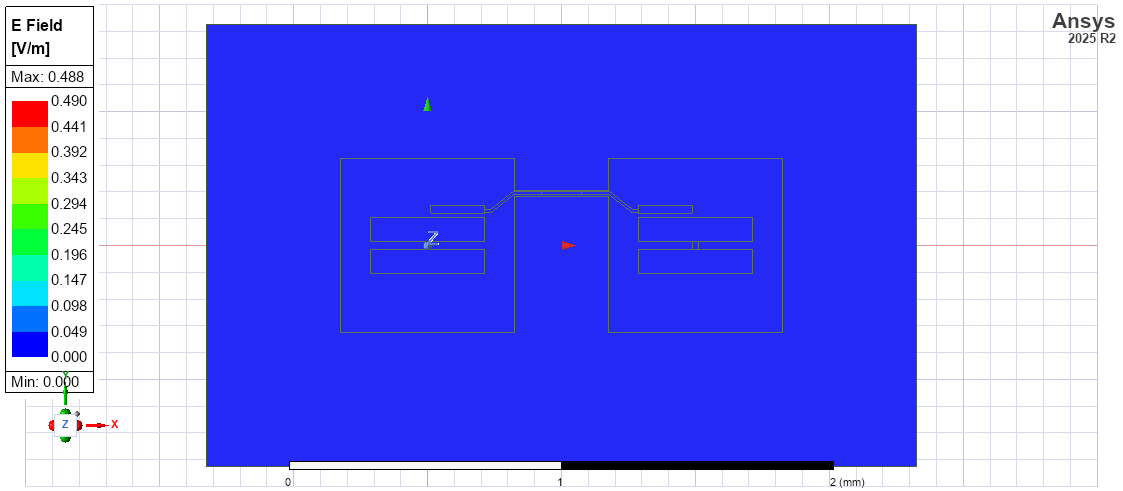

PosixPath('/home/abhis/Documents/metal_ansys_test/packages/qiskit-metal/tutorials/4 Analysis/A. Core - EM and quantization/ansys.png')

In [16]:
eig_2qb.sim.plot_fields('main', eigenmode=1)
eig_2qb.sim.save_screenshot()

### EPR Analysis
#### Setup
Identify the non-linear (Josephson) junctions in the model. in this case there are 2 junctions, which we will refer to as `jj1` and `jj2`. Also define the dissipative reference shapes. Remove the default junction and create the two.

In [18]:
del eig_2qb.setup.junctions['jj']

In [19]:
eig_2qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')
eig_2qb.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                  Lj_variable='Lj2', Cj_variable='Cj2')
eig_2qb.setup.sweep_variable = 'Lj1'
eig_2qb.setup

{'junctions': {'jj1': {'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_',
   'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1'},
  'jj2': {'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_',
   'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [20]:
eig_2qb.run_epr()

Design "TwoTransmons_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TwoTransmons_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 1.83696410153275e-26
        energy_elec_substrate = 1.69394240403047e-26
        EPR of substrate = 92.2%

        energy_mag    = 7.47140766187245e-29
        energy_mag % of energy_elec_all  = 0.4%
        

Variation 0  [1/1]

  Mode 0 at 5.65 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.6%  9.185e-27 3.736e-29

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.83%
	jj1             0.995276  (+)        0.0325585
		Energy fraction (Lj over Lj&Cj)= 97.79%
	jj2             0.000415895  (+)        9.41898e-06
		(U_tot_cap-U_tot_ind)/mean=1.61%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 =

INFO:Global:Export Convergence to  /tmp/tmpx2n4zh1a.conv
WARNING 01:20AM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR/Project10/TwoTransmons_hfss/2025-12-13 01-20-24.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.032885
1    1.033222
dtype: float64

Pm_norm idx =
     jj1    jj2
0   True  False
1  False   True


  self.Qm_coupling[variation].columns[junctions]

  result["Qs"] = self.Qs[variation][self.PM[variation].columns[junctions]][

  return np.asarray(x, float)

  return np.asarray(x, float)

  return np.asarray(x, float)



*** P (participation matrix, not normlz.)
        jj1       jj2
0  0.963884  0.000403
1  0.000407  0.961742

*** S (sign-bit matrix)
   s_jj1  s_jj2
0     -1      1
1     -1     -1
*** P (participation matrix, normalized.)
         1   0.0004
   0.00041     0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       314     0.52
      0.52      313

*** Chi matrix ND (MHz) 
    355+0j 0.542+0j
  0.542+0j   346+0j

*** Frequencies O1 PT (MHz)
0    5331.095688
1    6468.906509
dtype: float64

*** Frequencies ND (MHz)
0    5311.080454+0.000000j
1    6452.830557+0.000000j
dtype: complex128

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
0,5311.08+0.00j
1,6452.83+0.00j


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0           1
Lj1                          
13  0  355.2+0.0j  0.54+0.00j
    1  0.54+0.00j  346.3+0.0j

Release Ansys's session

In [21]:
eig_2qb.sim.close()

PyAEDT INFO: Desktop has been released and closed.


INFO:Global:Desktop has been released and closed.


(optional) **final wrap**: Close the gui by removing the # in the line below.

In [ ]:
# gui.main_window.close()